In [79]:
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [80]:
def add_data(hmap, data, ts):
    if ts not in hmap:
        hmap[ts] = data
    elif data != hmap[ts]:
        print(f"WHY {ts} is already in: {hmap}")

In [81]:
def create_df(filename, write=False):
    print(filename)
    with open(filename, 'r') as file:
        timestamps = []
        accel_x = []
        accel_y = []
        accel_z = []
        gyro_x = []
        gyro_y = []
        gyro_z = []

        for line in file:
            data_line = line.strip()
            if data_line and data_line[0].isdigit():
                # print(data_line)
                node_num, timestamp, ax, ay, az, gx, gy, gz, mx, my, mz = data_line.split(",")
                timestamps.append(int(timestamp))
                accel_x.append(float(ax))
                accel_y.append(float(ay))
                accel_z.append(float(az))
                gyro_x.append(float(gx))
                gyro_y.append(float(gy))
                gyro_z.append(float(gz))

        df = pd.DataFrame({'timestamp': timestamps, 'accel_x': accel_x, 'accel_y': accel_y, 'accel_z': accel_z, 'gyro_x': gyro_x, 'gyro_y': gyro_y, 'gyro_z': gyro_z})
        cleaned_df = df.interpolate(method="linear", limit_direction="both")
        name = "../csvs2/" + filename.split("/")[-1].split(".")[0] + "_df.csv"
        if write:
            cleaned_df.to_csv(name, index=False)
        print(cleaned_df.head())
        return cleaned_df

In [82]:
def plot_df(df, title):
    df.plot(x="timestamp", figsize=(10,8))
    peaks, _ = find_peaks(df["accel_y"], height=0)
    plt.plot(peaks, x[peaks], "x")
    plt.title(title)
    plt.xlabel("Timestamp")
    plt.ylabel("IMU Data")
    plt.show()

In [83]:
training_files = ["../data2/bicep_curl/bicep_jake_set1_reps10_1.log",
                  "../data2/bicep_curl/bicep_suzan_set1_reps10_1.log", 
                  "../data2/bicep_curl/bicep_udai_set1_reps10_1.log", 
                  "../data2/shoulder_press/suzan_shoulder_set1.log", 
                  "../data/shoulder_press/jake_shoulder_set1.log", 
                  "../data/shoulder_press/udai_shoulder_set1.log", 
                  "../data/row/suzan_row_set1.log", 
                  "../data/row/jake_row_set1.log", 
                  "../data/row/udai_row_set1.log", 
                  "../data/rdl/suzan_rdl_set1.log", 
                  "../data/rdl/jake_rdl_set1.log", 
                  "../data/rdl/jessica_rdl_set1.log", 
                  "../data/squat/suzan_squat_set1.log", 
                  "../data/squat/jake_squat_set1.log", 
                  "../data/squat/udai_squat_set1.log"]

test_files = ["../data/bicep_curl/suzan_bicep_set2.log", 
              "../data/bicep_curl/jake_bicep_set2.log", 
              "../data/bicep_curl/udai_bicep_set2.log", 
              "../data/shoulder_press/suzan_shoulder_set2.log", 
              "../data/shoulder_press/jake_shoulder_set2.log", 
              "../data/shoulder_press/udai_shoulder_set2.log", 
              "../data/row/suzan_row_set2.log", 
              "../data/row/jake_row_set2.log", 
              "../data/row/udai_row_set2.log", 
              "../data/rdl/suzan_rdl_set2.log", 
              "../data/rdl/jake_rdl_set2.log", 
              "../data/rdl/jessica_rdl_set2.log", 
              "../data/squat/suzan_squat_set2.log", 
              "../data/squat/jake_squat_set2.log", 
              "../data/squat/udai_squat_set2.log"]

../data2/bicep_curl/bicep_jake_set1_reps10_1.csv
   timestamp  accel_x  accel_y  accel_z  gyro_x  gyro_y  gyro_z
0     290375   -1.572   -7.716    5.983  -0.204   0.038   0.077
1     290379   -1.625   -7.711    6.048  -0.161   0.027   0.073
2     290382   -1.625   -7.711    6.048  -0.161   0.027   0.073
3     290386   -1.687   -7.732    6.049  -0.161   0.027   0.068
4     290409   -1.742   -7.766    6.050  -0.053  -0.007   0.054


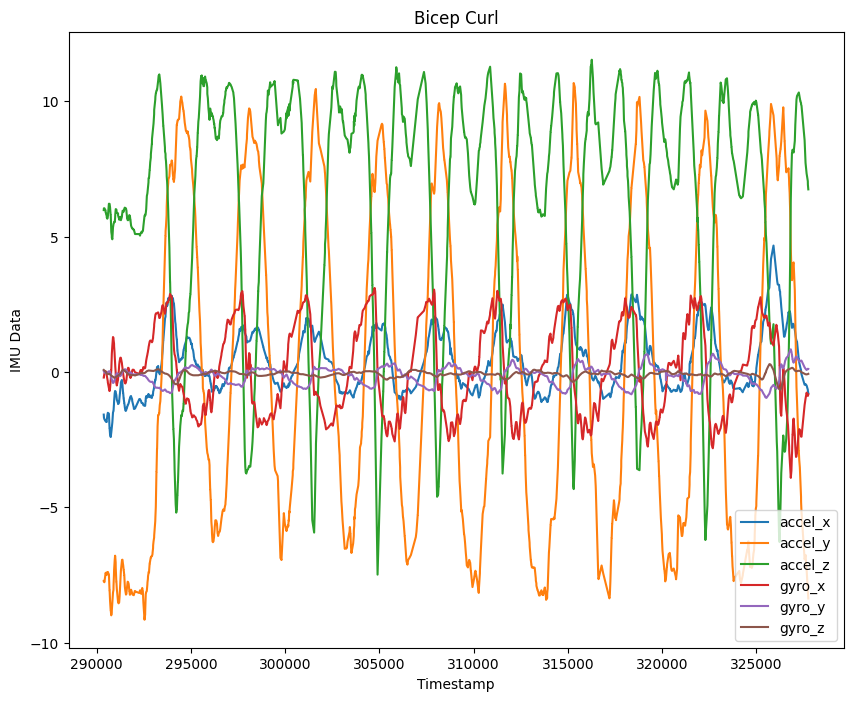

In [85]:
file = "../data2/bicep_curl/bicep_jake_set1_reps10_1.csv"
df = create_df(file)
plot_df(df, "Bicep Curl")

../data2/bicep_curl/bicep_suzan_set1_reps10_1.csv
   timestamp  accel_x  accel_y  accel_z  gyro_x  gyro_y  gyro_z
0      81488   -1.497   -8.644    3.996  -0.105  -0.048  -0.060
1      81492   -1.497   -8.644    3.996  -0.105  -0.048  -0.060
2      81496   -1.522   -8.663    4.074  -0.105  -0.048  -0.060
3      81705   -1.516   -8.778    3.862   0.114  -0.100  -0.059
4      81730   -1.517   -8.743    3.927  -0.043  -0.071  -0.067


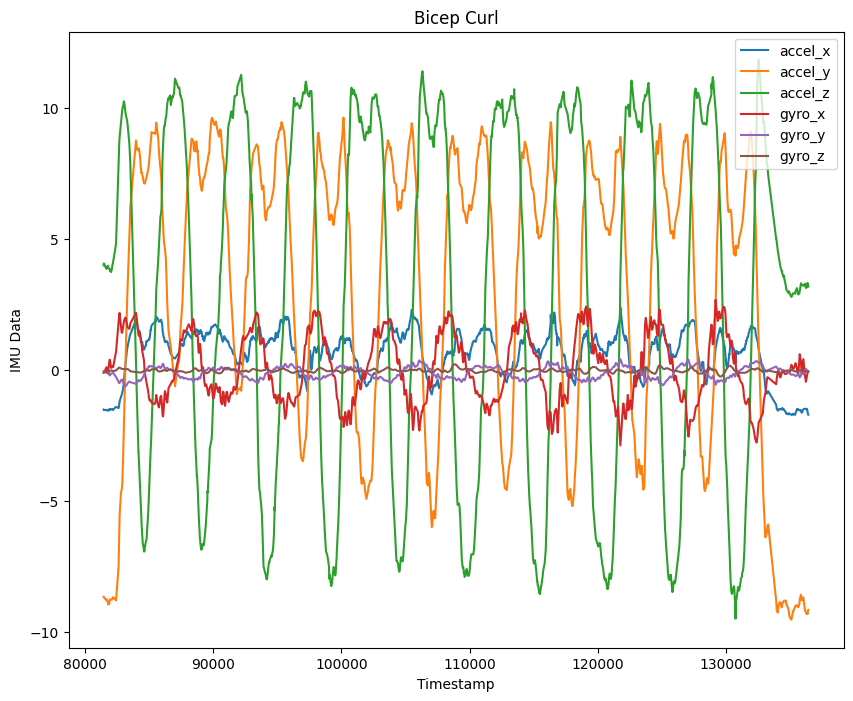

In [86]:
file = "../data2/bicep_curl/bicep_suzan_set1_reps10_1.csv"
df = create_df(file)
plot_df(df, "Bicep Curl")

../data2/bicep_curl/bicep_udai_set1_reps10_1.csv
   timestamp  accel_x  accel_y  accel_z  gyro_x  gyro_y  gyro_z
0     208565   -1.065   -5.015    7.876   0.125  -0.076  -0.017
1     208569   -1.065   -5.015    7.876   0.125  -0.076  -0.017
2     208573   -1.065   -5.091    7.829   0.125  -0.076  -0.017
3     208576   -1.064   -5.091    7.829   0.050  -0.064  -0.020
4     208599   -1.137   -5.216    7.834  -0.078  -0.034  -0.020


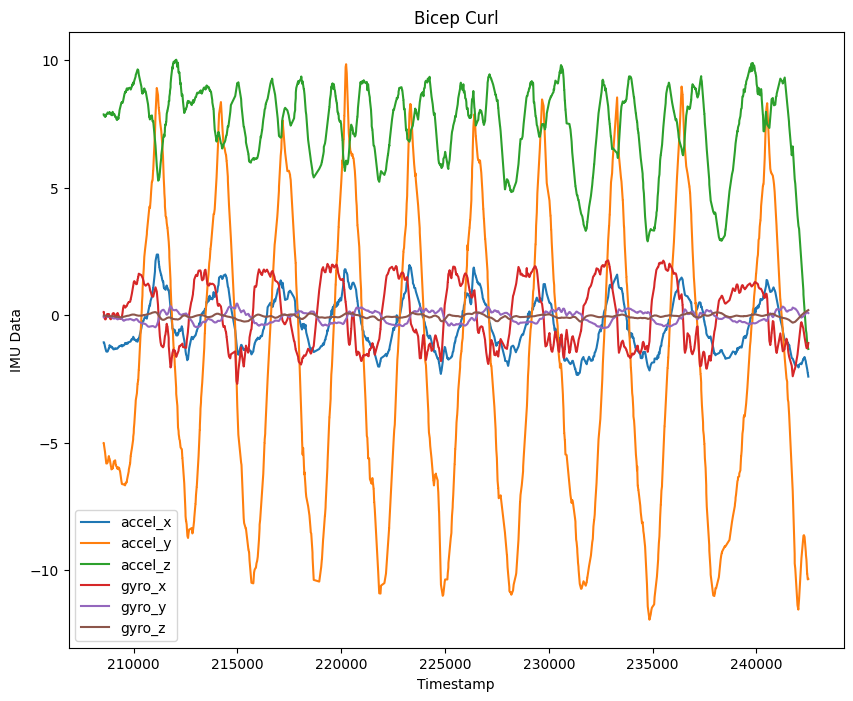

In [87]:
file = "../data2/bicep_curl/bicep_udai_set1_reps10_1.csv"
df = create_df(file)
plot_df(df, "Bicep Curl")